In [1]:
import pandas as pd

dataset=pd.read_csv('TESLA_data.csv').values
open_value=dataset[:,1]
print(open_value[:5])

open_value=open_value.reshape(-1,1) #convering into a column vector
print(open_value[:5])

print(open_value.shape)

[67.7142 68.0714 68.5014 66.7442 66.3599]
[[67.7142]
 [68.0714]
 [68.5014]
 [66.7442]
 [66.3599]]
(1259, 1)


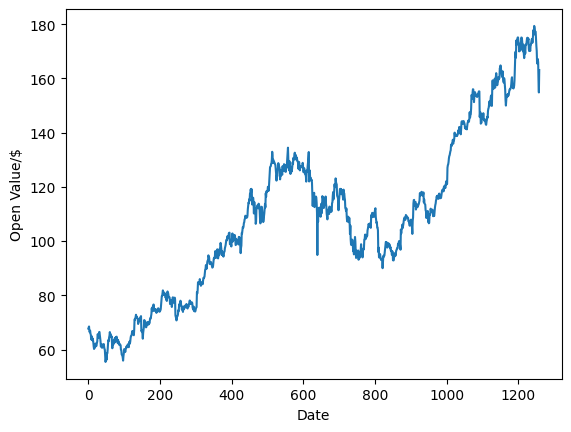

In [2]:
from matplotlib import pyplot as plt

plt.plot(open_value)
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [3]:
from sklearn.preprocessing import MinMaxScaler


scaler=MinMaxScaler(feature_range=(0,1))
scaled_open_value=scaler.fit_transform(open_value)

print(open_value[:5])
print(scaled_open_value[:5])

[[67.7142]
 [68.0714]
 [68.5014]
 [66.7442]
 [66.3599]]
[[0.09915624]
 [0.10203815]
 [0.10550741]
 [0.09133024]
 [0.08822969]]


In [5]:
data=[]
target=[]

for i in range(50,open_value.shape[0]):
    data.append(scaled_open_value[i-50:i])
    target.append(scaled_open_value[i])

In [6]:
import numpy as np

data_np=np.array(data)
target_np=np.array(target)

print(data_np.shape)
print(target_np.shape)

(1209, 50, 1)
(1209, 1)


In [8]:
train_data=data_np[:1000]
train_target=target_np[:1000]

test_data=data_np[1000:]
test_target=target_np[1000:]

print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1000, 50, 1)
(209, 50, 1)
(1000, 1)
(209, 1)


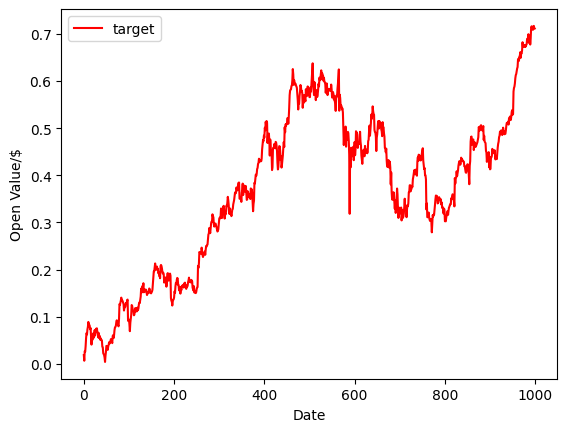

In [9]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='target')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

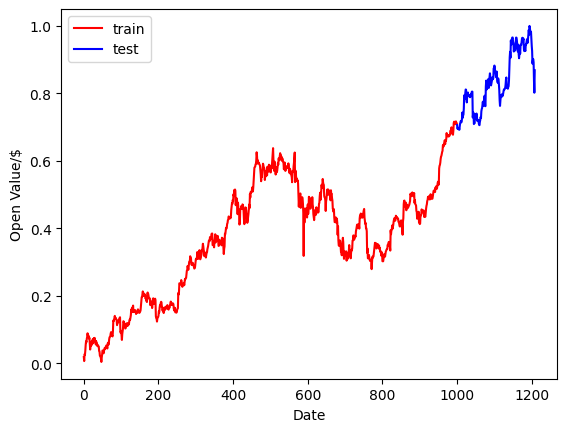

In [10]:
from matplotlib import pyplot as plt

test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model=Sequential()

model.add(LSTM(units=96,return_sequences=True,input_shape=(50,1)))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=40,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse',optimizer='adam')

c:\Users\USER\Music\DeepL\myenvdeep\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target))

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0359 - val_loss: 0.0030
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.0036 - val_loss: 0.0023
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0039 - val_loss: 0.0052
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0039 - val_loss: 0.0108
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0034 - val_loss: 0.0075
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - loss: 0.0026 - val_loss: 0.0055
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 0.0024 - val_loss: 0.0024
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 5

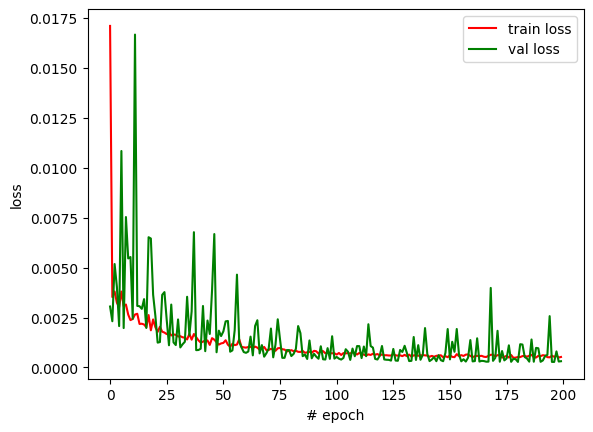

In [13]:
plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
result=model.predict(test_data)

from sklearn.metrics import r2_score

r2=r2_score(test_target,result)
print('r2 score:',r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
r2 score: 0.9579462405822203


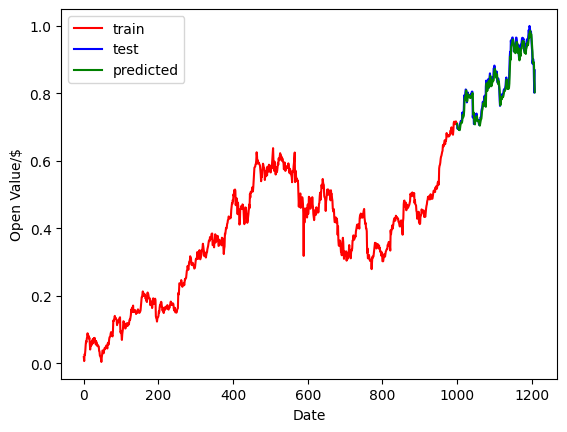

In [15]:
test_x_range=np.arange(1000,1209,1)
#test_x_range is an array of values between 1000-1208

plt.plot(train_target,'r',label='train')
plt.plot(test_x_range,test_target,'b',label='test')
plt.plot(test_x_range,result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

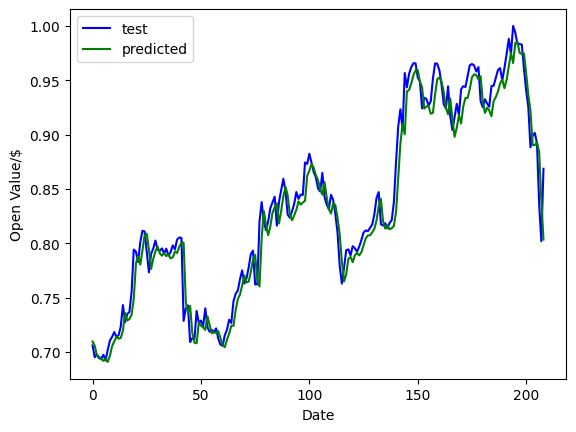

In [16]:
plt.plot(test_target,'b',label='test')
plt.plot(result,'g',label='predicted')

plt.xlabel('Date')
plt.ylabel('Open Value/$')
plt.legend()
plt.show()

In [17]:
import numpy as np

test_data=np.array([60.6428,60.6928,60.9085,61.1571,61.9599,62.0214,60.9999,60.2242,60.0385,57.8557,55.4242,56.0914,57.7128,56.2199,58.7464,58.5442,60.0642,62.1571,63.4942,63.1114,64.4728,65.1014,66.4242,65.5771,65.6871,65.4242,64.5014,64.8356,62.7371,60.4628,62.7214,61.7014,62.5928,63.4357,62.2785,62.9785,64.2714,
           62.8571,63.6642,64.6428,64.3899,64.7456,63.6642,63.6385,62.3571,63.5328,62.2485,62.7857,61.7857,62.1999]).reshape(1,-1)
print(test_data.shape)

reshaped_test_data = np.array(test_data).reshape(-1, 1) #column array

(1, 50)


In [18]:
test_data=scaler.transform(reshaped_test_data)

In [19]:
test_data=test_data.reshape((1,50,1))
print(test_data.shape)

result=model.predict(test_data)

(1, 50, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [20]:
print(result)

[[0.04979593]]


In [21]:
transformed_result=scaler.inverse_transform(result)
print(transformed_result[0][0])

61.596195
